# Rozwiązanie pracy domowej nr 6

In [ ]:
# pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Przygotowanie danych

In [2]:
chess_king_rook_vs_king = fetch_ucirepo(id=23) 
X = chess_king_rook_vs_king.data.features 
y = chess_king_rook_vs_king.data.targets

In [3]:
df = pd.merge(X, y, left_index=True, right_index=True)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [4]:
df['black-king-file'].unique()

array(['c', 'd', 'e', 'f', 'g', 'h', 'a', 'b'], dtype=object)

In [6]:
position_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}
for col in ['white-king-file', 'white-rook-file', 'black-king-file']:
    df[col] = df[col].map(position_map)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,draw
1,1,1,3,1,3,2,draw
2,1,1,3,1,4,1,draw
3,1,1,3,1,4,2,draw
4,1,1,3,2,3,1,draw


In [7]:
df['white-depth-of-win'].unique()

array(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six',
       'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen',
       'fourteen', 'fifteen', 'sixteen'], dtype=object)

In [9]:
depth_map = {'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
    'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14,
    'fifteen': 15, 'sixteen': 16}

df['white-depth-of-win'] = df['white-depth-of-win'].map(depth_map)
df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,-1
1,1,1,3,1,3,2,-1
2,1,1,3,1,4,1,-1
3,1,1,3,1,4,2,-1
4,1,1,3,2,3,1,-1


In [10]:
d_col = df['white-king-file'] - df['black-king-file']
d_row = df['white-king-rank'] - df['black-king-rank']

df['euclidean'] = np.sqrt(d_col**2 + d_row**2)
df['manhattan'] = np.abs(d_col) + np.abs(d_row)
df['chebyshev'] = np.maximum(np.abs(d_col), np.abs(d_row))

df.head()

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euclidean,manhattan,chebyshev
0,1,1,2,3,3,2,-1,2.236068,3,2
1,1,1,3,1,3,2,-1,2.236068,3,2
2,1,1,3,1,4,1,-1,3.000000,3,3
3,1,1,3,1,4,2,-1,3.162278,4,3
4,1,1,3,2,3,1,-1,2.000000,2,2


In [ ]:
df['dist_left'] = df['black-king-file'] - 1
df['dist_right'] = 8 - df['black-king-file']
df['dist_bottom'] = df['black-king-rank'] - 1
df['dist_top'] = 8 - df['black-king-rank']

df['black_edge_dist'] = df[[ 'dist_left', 'dist_right', 'dist_bottom', 'dist_top']].min(axis = 1)

df.drop(columns = ['dist_left', 'dist_right', 'dist_bottom', 'dist_top'], inplace = True)

# Zadanie 1

In [14]:
df_mate = df.loc[df['white-depth-of-win'] == 0]
df_draw = df.loc[df['white-depth-of-win'] == -1]
heatmap_mate = pd.crosstab(df_mate['black-king-rank'], df_mate['black-king-file'])
heatmap_draw = pd.crosstab(df_draw['black-king-rank'], df_draw['black-king-file'])

In [15]:
heatmap_mate = heatmap_mate.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)
heatmap_draw = heatmap_draw.reindex(index=range(1, 9), columns=range(1, 9), fill_value=0)

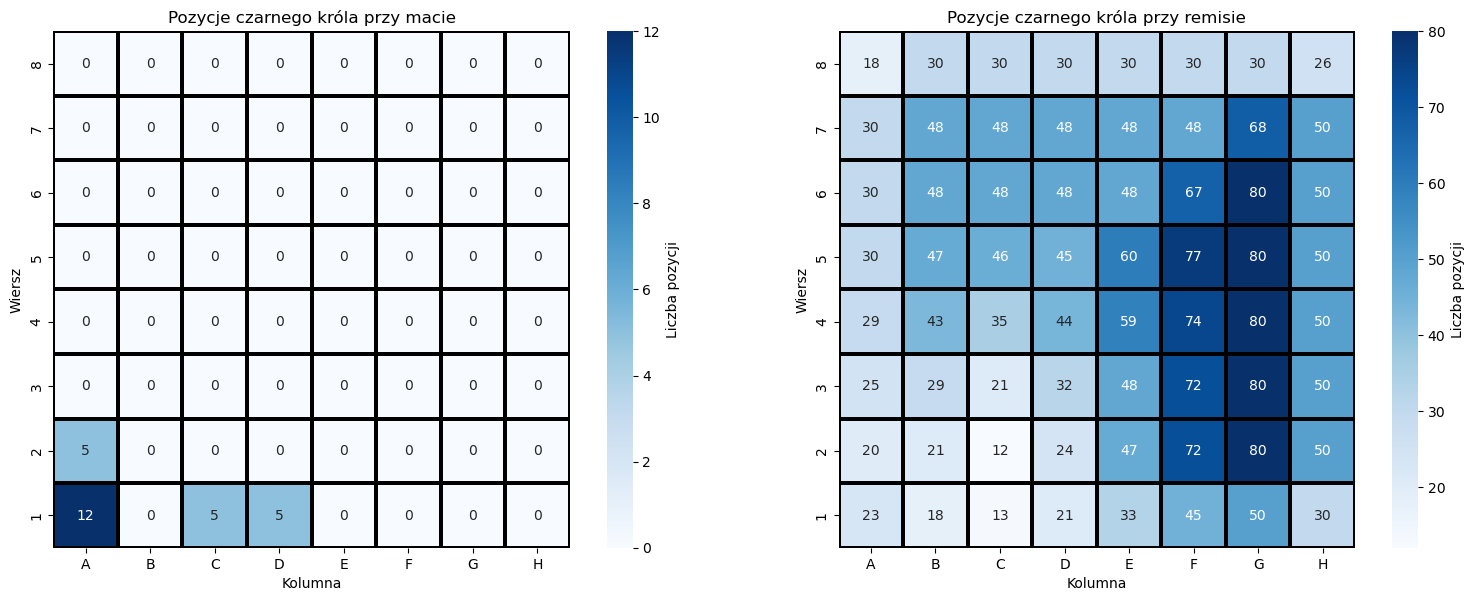

In [ ]:
plt.figure(figsize=(16, 6))

# 1. Mat
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_mate, annot = True, fmt = 'd', square = True, cmap = 'Blues', linewidths = 1.5, 
            linecolor = 'black', cbar_kws = {'label': 'Liczba pozycji'}, xticklabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.gca().invert_yaxis()
plt.title('Pozycje czarnego króla przy macie')
plt.xlabel('Kolumna')
plt.ylabel('Wiersz')

# 2. Remis
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_draw, annot = True, fmt = 'd', square = True, cmap = 'Blues', linewidths = 1.5, 
            linecolor = 'black', cbar_kws = {'label': 'Liczba pozycji'}, xticklabels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
plt.gca().invert_yaxis()
plt.title('Pozycje czarnego króla przy remisie')
plt.xlabel('Kolumna')
plt.ylabel('Wiersz')

plt.tight_layout()
plt.show()

* Pozycje prowadzące do natychmiastowego mata są silnie skoncentrowane w lewym dolnym narożniku planszy. Około 44% wszystkich pozycji matowych występuje, gdy czarny król znajduje się na polu A1. Pozostałe pozycje matowe pojawiają się wyłącznie na polach A2, C1 oraz D1, każdorazowo z taką samą, wyraźnie mniejszą częstością. W zbiorze danych nie występują żadne pozycje matowe, w których czarny król znajdowałby się w centralnej części planszy.
* Pozycje remisowe są znacznie bardziej rozproszone na planszy. Remisy występują na każdym polu szachownicy, przy czym wyraźne maksimum częstości obserwowane jest w środkowo-prawej części planszy, w szczególności w kolumnach F i G oraz w wierszach 2–7.

# Zadanie 2

In [ ]:
df_no_draw = df.loc[df['white-depth-of-win'] != -1]

In [ ]:
corr_euclid = df_no_draw['euclidean'].corr(df_no_draw['white-depth-of-win'])
corr_manh = df_no_draw['manhattan'].corr(df_no_draw['white-depth-of-win'])
corr_cheb = df_no_draw['chebyshev'].corr(df_no_draw['white-depth-of-win'])
corrs = {'euclidean': corr_euclid, 'manhattan': corr_manh, 'chebyshev': corr_cheb}

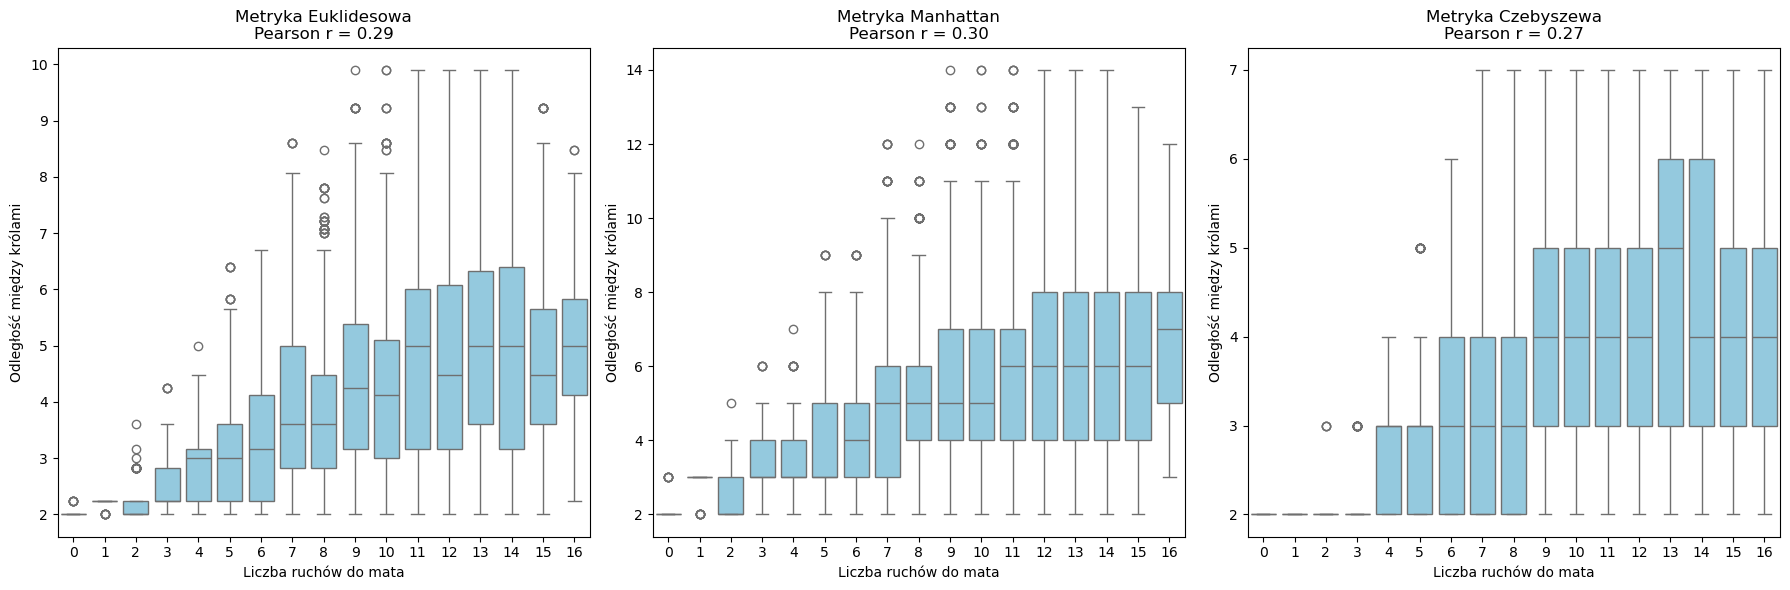

In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev']
titles = ['Metryka Euklidesowa', 'Metryka Manhattan', 'Metryka Czebyszewa']
plt.figure(figsize = (18, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x = 'white-depth-of-win', y = metric, data = df_no_draw,color = 'skyblue')
    plt.title(f'{titles[i]}\nPearson r = {corrs[metric]:.2f}')
    plt.xlabel('Liczba ruchów do mata')
    plt.ylabel('Odległość między królami')
plt.tight_layout()
plt.show()

Spośród rozważanych metryk dystansu pomiędzy białym a czarnym królem najlepiej liczbę ruchów do zakończenia gry oszacowuje metryka Manhattan. Potwierdza to zarówno najwyższa wartość współczynnika korelacji Pearsona (r ≈ 0.30), jak i charakter rozkładów widocznych na wykresach pudełkowych. W przypadku metryki Manhattan mediany dystansu rosną w sposób najbardziej monotoniczny wraz ze wzrostem liczby ruchów do mata, a rozrzut wartości dla danej liczby ruchów jest relatywnie mniejszy niż dla metryki euklidesowej.

# Zadanie 3

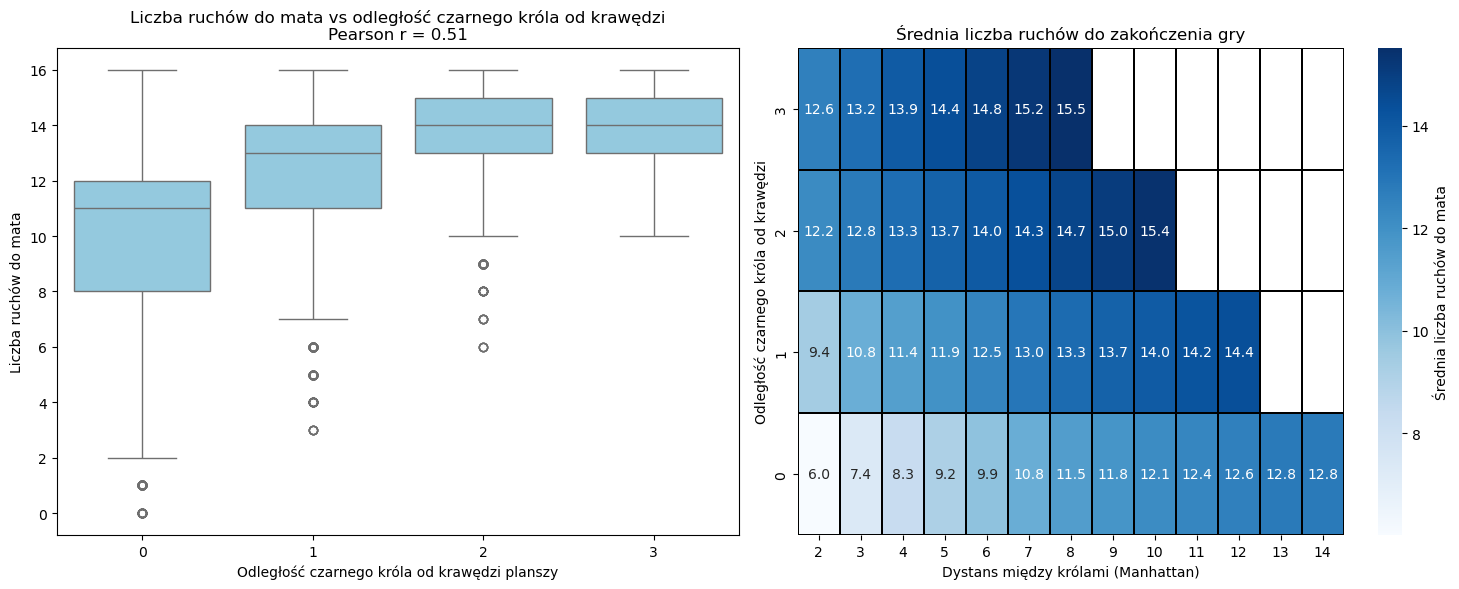

In [50]:
corr_edge = df_no_draw['black_edge_dist'].corr(df_no_draw['white-depth-of-win'])
pivot = df_no_draw.pivot_table(index = 'black_edge_dist', columns = 'manhattan', 
                               values = 'white-depth-of-win', aggfunc = 'mean')
plt.figure(figsize = (15, 6))
plt.subplot(1,2,1)
sns.boxplot(x = 'black_edge_dist', y = 'white-depth-of-win', data = df_no_draw, color = 'skyblue')
plt.title(f'Liczba ruchów do mata vs odległość czarnego króla od krawędzi\nPearson r = {corr_edge:.2f}')
plt.xlabel('Odległość czarnego króla od krawędzi planszy')
plt.ylabel('Liczba ruchów do mata')
plt.subplot(1,2,2)
ax = sns.heatmap(pivot, annot = True, fmt = '.1f', cmap = 'Blues', linewidths = 1.2, linecolor = 'black',
             cbar_kws = {'label': 'Średnia liczba ruchów do mata'})
ax.invert_yaxis()
plt.title('Średnia liczba ruchów do zakończenia gry')
plt.xlabel('Dystans między królami (Manhattan)')
plt.ylabel('Odległość czarnego króla od krawędzi')
plt.tight_layout()
plt.show()

* Tak, odległość czarnego króla od krawędzi planszy jest istotnie związana z liczbą ruchów do zakończenia gry. Wraz ze wzrostem tej odległości rośnie mediana liczby ruchów potrzebnych do mata, co potwierdza dodatnia korelacja Pearsona na poziomie r ≈ 0.51.
* Tak, uzupełnienie tej informacji o dystans pomiędzy białym a czarnym królem może w tym dodatkowo pomóc. Pokazuje to heatmapa średniej liczby ruchów (w metryce Manhattan), na której dla tej samej odległości od krawędzi różne wartości dystansu między królami prowadzą do wyraźnie różnych średnich czasów zakończenia gry. Wskazuje to, że obie cechy niosą częściowo niezależną informację i ich połączenie pozwala lepiej oszacować liczbę ruchów do zakończenia gry.